## Solving Problems
We've shown in the introductory chapter how intelligence can be thought of as a form of compression, enabling us to recognize patterns and make sense of the world around us. To embark on our journey of deconstructing this understanding into machine code, thus enabling machine learning, we'll start by exploring linear regression. To my knowledge, this is the simplest optimization algorhitm, as I first encountered it in a High School algebra class, although it's significance wasn't fully contextualized by the constraints of Public School. 

<img src="../images/ginko.png" style="width: 100px; height: 100px; object-fit:cover;">

Suppose we're a scientist studying plants and we picked up a leaf-looking sample from an environment, and we want to determine if the sample is an existing species or a new one.
We cross reference characteristics of the sample with existing human knowledge, and we come to the conclusion that the sample might be a ginko leaf; however, upon retrospection you notice that the sample is x10 larger in size then what ginko leaves are described to be(~6.35cm). We come to the conclusion that this might infact be a new variant of a ginko leaf; this is what we call a [hypothesis](https://en.wikipedia.org/wiki/Hypothesis). To prove this, and to gain mad Biology street cred, we come back to the tree to gather more evidence by way of collecting more samples. We measure the lenghts of each of the blades, and write them into a big data table.

<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">
<img src="../images/ginko.png" style="width: 50px; height: 50px; object-fit:cover;">

By doing so, we constructed a [metric]() upon our problem domain.

$$\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)$$







 
## Statistical Approach 
By approaching our problem statistically, allows us to reason clearly about the wider domain of our problem.
 
#### Linear Regression


 **Variance** is a measure of the spread or dispersion of a set of data points. It indicates how far individual data points are from the mean of the dataset. Mathematically, the variance of a variable $x$ is calculated as:

$$
\operatorname{Var}(x) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}
$$

where $x_i$ is an individual data point, $\overline{x}$ is the mean of $x$, and $n$ is the number of data points.

**Covariance** is a measure of the joint variability between two variables. It indicates the degree to which two variables change together. In the context of linear regression, covariance is used to understand how much the dependent variable ($y$) changes concerning the independent variable ($x$). Mathematically, the covariance between two variables $x$ and $y$ is calculated as:

$$
\operatorname{Cov}(x, y) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{n - 1}
$$

where $x_i$ and $y_i$ are the individual data points, $\overline{x}$ and $\overline{y}$ are the means of $x$ and $y$, and $n$ is the number of data points.

**In Linear Regression**, we aim to find the best-fit line that models the relationship between the independent variable ($x$) and the dependent variable ($y$). To do this, we need to estimate the slope ($m$) and intercept ($c$) of the line:

$$
y = mx + c
$$

The slope ($m$) represents the rate of change of $y$ concerning $x$, and the intercept ($c$) is the point where the line crosses the y-axis (when $x$ is 0).

Covariance and variance are used to estimate the slope ($m$) of the best-fit line:

$$
m = \frac{\operatorname{Cov}(x, y)}{\operatorname{Var}(x)}
$$

The slope ($m$) is calculated as the ratio of the covariance between $x$ and $y$ to the variance of $x$. This ratio represents the average change in $y$ per unit change in $x$. Once the slope ($m$) is calculated, the intercept ($c$) can be computed as:

$$
c = \overline{y} - m \overline{x}
$$

By estimating the slope and intercept, we can create the linear model that best describes the relationship between the two variables.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Reading the csv file.
df = pd.read_csv('./data.csv')

# Convert DataFrame to a NumPy array
numpy_array = df.to_numpy(dtype=np.float32)


# Extract x and y coordinates from the NumPy array
x = numpy_array[:, 0]
y = numpy_array[:, 1]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Reading the csv file.
df = pd.read_csv('./data.csv')

# Convert DataFrame to a NumPy array
numpy_array = df.to_numpy(dtype=np.float32)


# Extract x and y coordinates from the NumPy array
x = numpy_array[:, 0]
y = numpy_array[:, 1]

Slope: 9.775804
Intercept: 2.483673


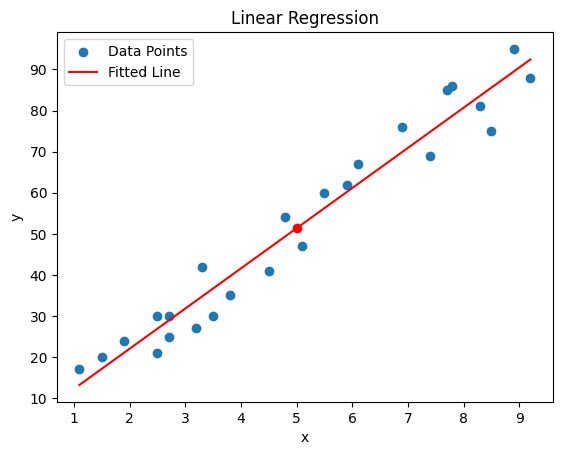

In [6]:
# Calculate the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the covariance of x and y, and the variance of x
cov_xy = np.sum((x - mean_x) * (y - mean_y))
var_x = np.sum((x - mean_x)**2)

# Compute the slope (m) and the intercept (c) of the line
m = cov_xy / var_x
c = mean_y - m * mean_x

# Make predictions for new x values
x_new = np.linspace(min(x), max(x), 100)  # 100 evenly spaced points between min(x) and max(x)
y_pred = m * x_new + c

# Print the slope and intercept
print("Slope:", m)
print("Intercept:", c)

# Plot the original data and the fitted line
import matplotlib.pyplot as plt

plt.plot(mean_x,mean_y,'ro') 
# plt.plot(var_x,mean_y,'go') 
plt.scatter(x, y, label='Data Points')
plt.plot(x_new, y_pred, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


## Optimization Approach
Statistically analyzing our data can be valuable, however these approaches break down in higher dimensions.

In [7]:
from IPython.display import clear_output
def gradient_descent(m, c, x, y, learning_rate, num_iterations, boundary=1):
    n = len(x)
    mae_history = []
    
    for i in range(num_iterations):
        # Calculate the gradients
        dm = -2 * np.mean((y - (m * x + c)) * x)
        dc = -2 * np.mean(y - (m * x + c))

        # Update the slope and intercept
        m -= learning_rate * dm
        c -= learning_rate * dc

        # Make predictions for new x values
        x_new = np.linspace(min(x), max(x), 100)
        y_pred = m * x_new + c

        # Compute the Mean Absolute Error (MAE)
        mae = np.mean(np.abs(y - (m * x + c)))
        mae_history.append(mae)

        # Create a 1x3 subplot
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        axes[0].set_title(f'Linear Regression - Iteration {i + 1}\nMAE: {mae:.4f}')
        axes[1].set_title('Residuals with Boundary')
        axes[2].set_title('Mean Absolute Error vs. Iteration Number')

        # Plot the linear regression with scaled residuals
        axes[0].scatter(x, y, label='Data Points')
        axes[0].plot(x_new, y_pred, color='red', label='Fitted Line')
        for xi, yi in zip(x, y):
            residual = yi - (m * xi + c)
            width = abs(residual) * 0.1
            axes[0].fill_between([xi - width/2, xi + width/2], yi, m * xi + c, color='green', alpha=0.15)
        
        # Plot the residuals as a function of the independent variable (x) and color them based on the boundary
        residuals = y - (m * x + c)
        color = np.where(residuals > boundary, 'blue', np.where(abs(residuals) <= boundary, 'green', 'blue'))
        axes[1].scatter(x, residuals, color=color, alpha=0.7)
        axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
        axes[1].axhline(boundary, color='blue', linestyle='--', linewidth=1, alpha=0.5)
        axes[1].axhline(-boundary, color='blue', linestyle='--', linewidth=1, alpha=0.5)

        

        # Plot the Mean Absolute Error (MAE) as a function of the iteration number
        axes[2].plot(range(1, i + 2), mae_history, color='blue', alpha=0.7)
        axes[2].set_xlabel('Iteration Number')
        axes[2].set_ylabel('Mean Absolute Error')

        plt.tight_layout()
        plt.show()

        # Clear the output to update the plot
        clear_output(wait=True)

# Apply gradient descent to find the optimal slope and intercept
gradient_descent(m, c, x, y, learning_rate, num_iterations)


#really ponder its significance, is the decision boundary the sum of all these tokens? is the decision boundary moving as you're generating the tokens? is the boundary the response in full?



NameError: name 'learning_rate' is not defined